In [21]:
#import functions and libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [22]:
# 1. Load dataset of the Parkinson's disease predictors 
df = pd.read_csv("https://raw.githubusercontent.com/NancyYan21/capstone_project_NY/refs/heads/main/parkinsons_updrs.data.csv") 
df.head()

,index,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [23]:
# 2. assessing whether there are missing values
print(df.isnull().sum())

index            0
subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64


In [24]:
# 3. correlation matrix of the voice measurements and demographics with both total and motor UPDRS
target_cols = ["total_UPDRS", "motor_UPDRS"]
corr = df.corr()[target_cols].sort_values(by="total_UPDRS", ascending=False)
print("Correlation with UPDRS:")
print(corr)

Correlation with UPDRS:
               total_UPDRS  motor_UPDRS
total_UPDRS       1.000000     0.947231
motor_UPDRS       0.947231     1.000000
age               0.310290     0.273665
subject#          0.253643     0.252919
index             0.251196     0.249790
RPDE              0.156897     0.128607
PPE               0.156195     0.162433
Shimmer:APQ11     0.120838     0.136560
Shimmer(dB)       0.098790     0.110076
Shimmer           0.092141     0.102349
Shimmer:APQ5      0.083467     0.092105
Shimmer:DDA       0.079363     0.084260
Shimmer:APQ3      0.079363     0.084261
test_time         0.075263     0.067918
Jitter(%)         0.074247     0.084816
Jitter(Abs)       0.066927     0.050903
Jitter:DDP        0.064027     0.072698
Jitter:RAP        0.064015     0.072684
Jitter:PPQ5       0.063352     0.076291
NHR               0.060952     0.074967
sex              -0.096559    -0.031205
DFA              -0.113475    -0.116242
HNR              -0.162117    -0.157029


Text(0.5, 1.0, 'Correlation Heatmap')

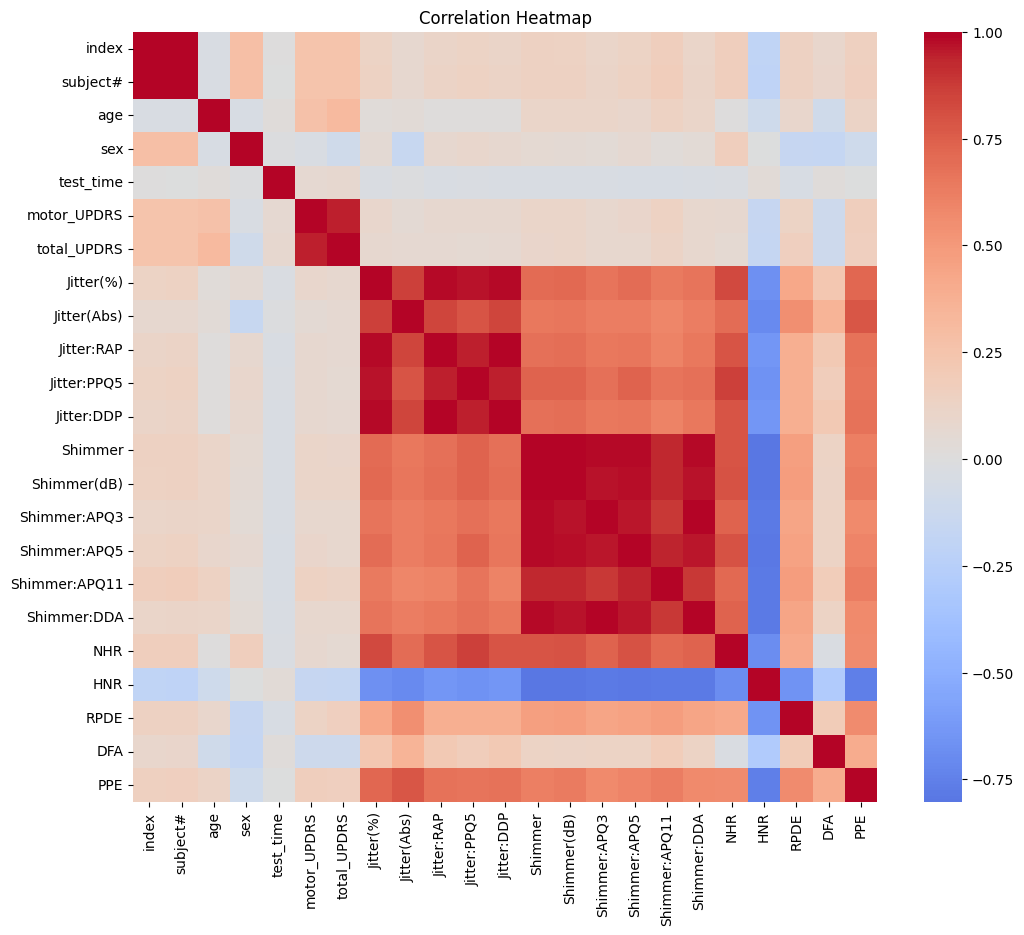

In [25]:
# 4. draw correlation heatmap to visualize the correlation between voice and UPDRS scores 
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")

In [26]:
# 5. train a simple model to predict total_UPDRS
#20% testing size and 80% training set 
X = df.drop(columns=["total_UPDRS"])
y = df["total_UPDRS"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Performance:")
print(f"R^2 Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

Model Performance:
R^2 Score: 0.91
RMSE: 3.09


Feature Importance:
          Feature    Importance
7     Jitter(Abs)  17135.791025
8      Jitter:RAP   8870.902459
13   Shimmer:APQ3   8141.661731
14   Shimmer:APQ5    107.129302
9     Jitter:PPQ5      6.291768
19           RPDE      2.978845
5     motor_UPDRS      1.210547
2             age      0.070951
12    Shimmer(dB)      0.060885
4       test_time      0.002400
0           index      0.001687
18            HNR     -0.081183
1        subject#     -0.188465
3             sex     -1.728025
17            NHR     -2.711049
20            DFA     -3.158056
21            PPE     -4.004836
11        Shimmer    -34.938327
15  Shimmer:APQ11    -50.307200
6       Jitter(%)   -309.774163
16    Shimmer:DDA  -2719.604212
10     Jitter:DDP  -2805.851115


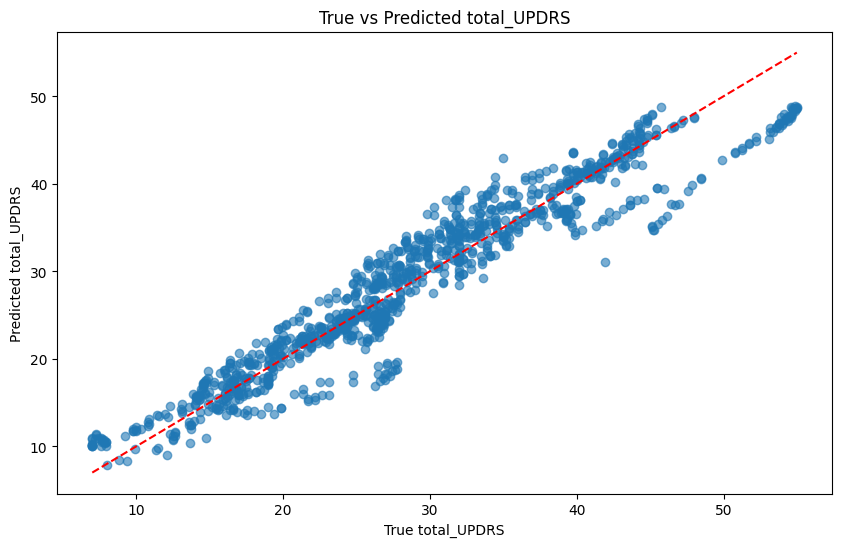

In [27]:
#6. print feature importance and plot true and predicted UPDRS values
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_,
}).sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importance)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("True total_UPDRS")
plt.ylabel("Predicted total_UPDRS")
plt.title("True vs Predicted total_UPDRS")
plt.plot( [y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--' )
plt.show()

Based on the correlation heatmap, feature importance estimates, and domain knowledge, several predictors showed minimal association with the total_UPDRS. These variables are then excluded and the model is refit using the six most impactful features.

Top 6 important features based on correlation with total_UPDRS:
motor_UPDRS      0.947231
HNR              0.162117
RPDE             0.156897
PPE              0.156195
Shimmer:APQ11    0.120838
DFA              0.113475
Name: total_UPDRS, dtype: float64


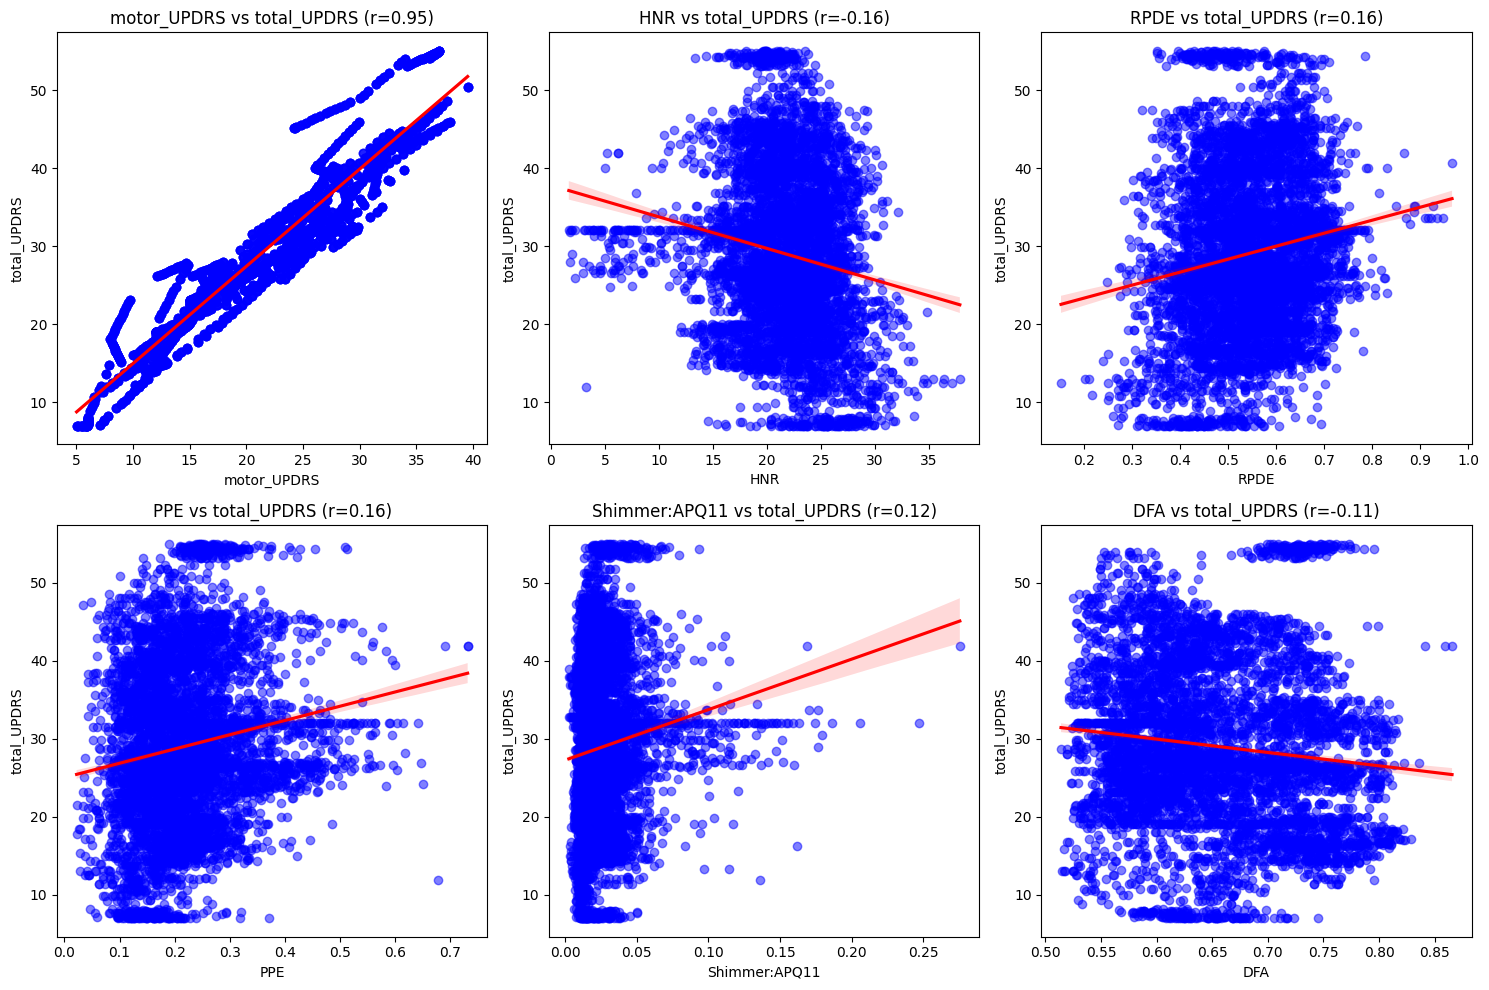

In [28]:
#7. remove unwanted/unnecessary features and choose the most 6 effecting factors to retrain the model
exclude_cols = ['index', 'subject#', 'age', 'sex', 'test_time', "total_UPDRS"]
valid_features = [col for col in X.columns if col not in exclude_cols]
corr = df[valid_features + ["total_UPDRS"]].corr(numeric_only=True)["total_UPDRS"].drop("total_UPDRS")
top6 = corr.abs().sort_values(ascending=False).head(6)
print("Top 6 important features based on correlation with total_UPDRS:")
print(top6)

#plot the correlation of these 6 features with total_UPDRS with trendline
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top6.index, 1):
    r = corr[feature]
    plt.subplot(2, 3, i)
    sns.regplot(
        x=df[feature],
        y=df["total_UPDRS"],
        scatter_kws={'alpha':0.5, 'color':'blue'},
        line_kws={'color':'red'})
    plt.title(f"{feature} vs total_UPDRS (r={r:.2f})")
plt.tight_layout()
plt.show()

Regression analysis summary with top 6 features:
                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     8770.
Date:                Tue, 21 Oct 2025   Prob (F-statistic):               0.00
Time:                        01:56:05   Log-Likelihood:                -15507.
No. Observations:                5875   AIC:                         3.103e+04
Df Residuals:                    5868   BIC:                         3.107e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

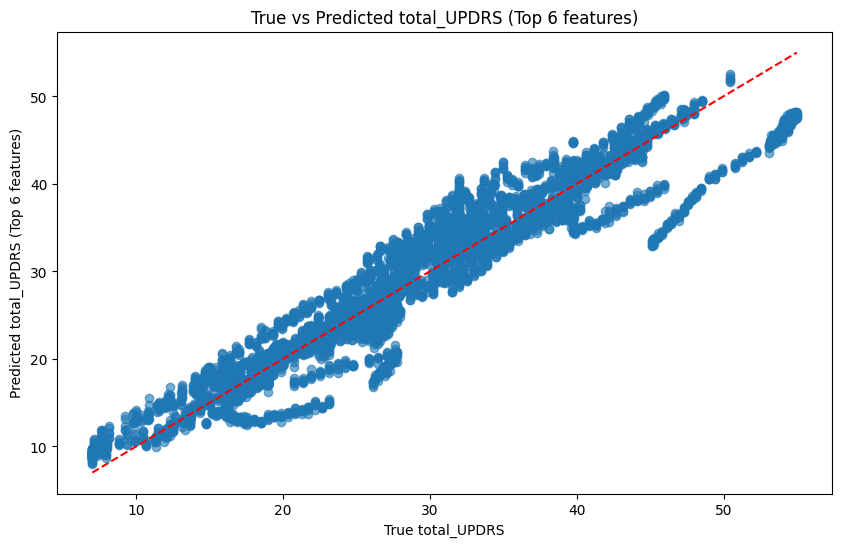

In [29]:
#use these 6 features to retrain the model
X = df[top6.index]
y = df["total_UPDRS"]
X = sm.add_constant(X)  # adding a constant
model = sm.OLS(y, X).fit()
print("Regression analysis summary with top 6 features:")
print(model.summary())
df['Predicted_total_UPDRS_top6'] = model.predict(X)

#plot true vs predicted total_UPDRS using top 6 features
plt.figure(figsize=(10, 6))
plt.scatter(df["total_UPDRS"], df['Predicted_total_UPDRS_top6'], alpha=0.6)
plt.xlabel("True total_UPDRS")
plt.ylabel("Predicted total_UPDRS (Top 6 features)")
plt.title("True vs Predicted total_UPDRS (Top 6 features)")
plt.plot([df["total_UPDRS"].min(), df["total_UPDRS"].max()],
         [df["total_UPDRS"].min(), df["total_UPDRS"].max()],
         color='red', linestyle='--')
plt.show()

/Users/nancyyan/.pyenv/versions/3.9.7/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Neural Network Model Performance:
R^2 Score: 0.95
RMSE: 2.44


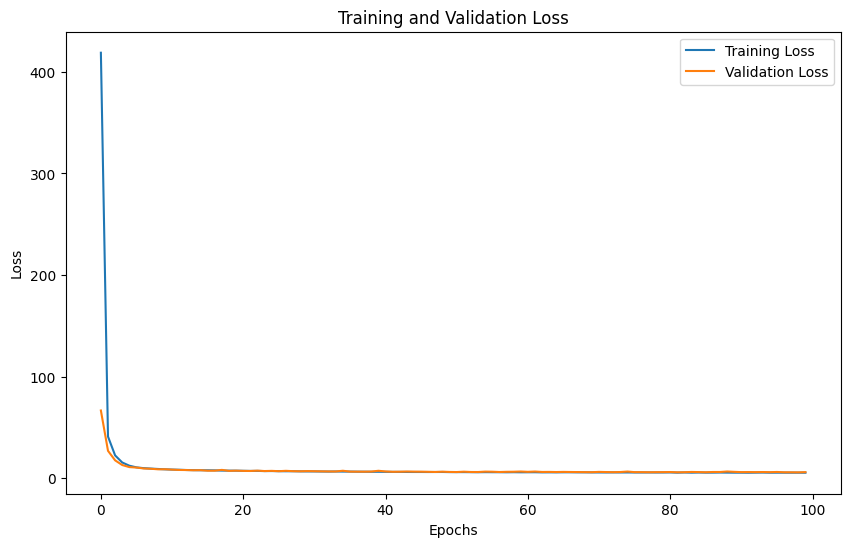

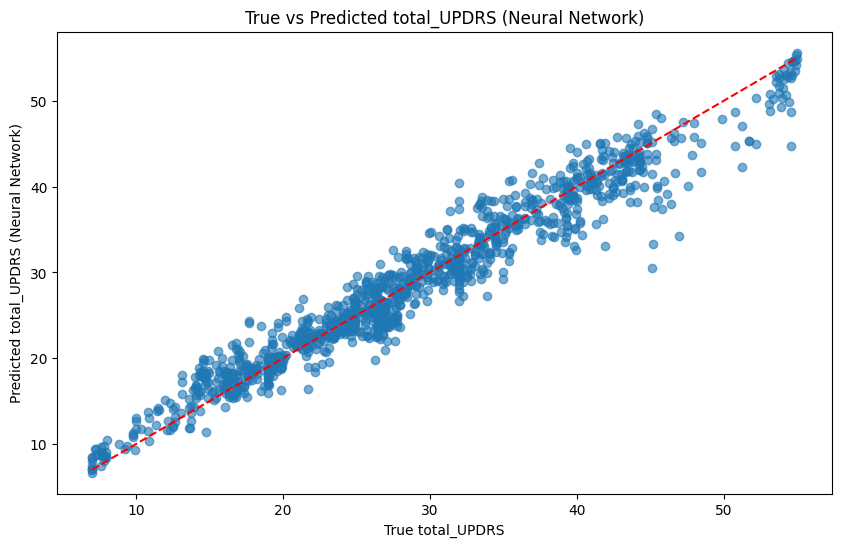

In [30]:
#8. build a neural network model with these 6 features with 2 layers
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, r2_score

X = df[top6.index]
y = df["total_UPDRS"]

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

#compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

#train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

#evaluate the model
y_pred_nn = model.predict(X_test_scaled).flatten()
r2_nn = r2_score(y_test, y_pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))

print("Neural Network Model Performance:")
print(f"R^2 Score: {r2_nn:.2f}")
print(f"RMSE: {rmse_nn:.2f}")

#plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#plot true vs predicted total_UPDRS using neural network
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.6)
plt.xlabel("True total_UPDRS")
plt.ylabel("Predicted total_UPDRS (Neural Network)")
plt.title("True vs Predicted total_UPDRS (Neural Network)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

